# 1. Framing the problem

* Who is the client?
* What exactly are they asking us to solve?
* What is their view of the problem?
* How can we translate their request into a concrete well-defined problem?
* How they imagine you could help them?

# 2. Data Collection

* Extract your customer's data
* Or scrape your own data
* What data do you need?
* How will you extract it?
* In what format?
* How do you avoid extract personally identifiable information?

### Loading data

In [ ]:
import datetime
print("Last run @%s" % (datetime.datetime.now(timezone('US/Pacific'))))

import pandas as pd
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

**SEE**: 
* [A visual guide to Pandas (yt)](https://www.youtube.com/watch?v=9d5-Ti6onew)  
* [Pandas cheatsheet](http://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3)
* https://www.kdnuggets.com/2017/01/pandas-cheat-sheet.html
* https://www.datacamp.com/community/blog/python-pandas-cheat-sheet 

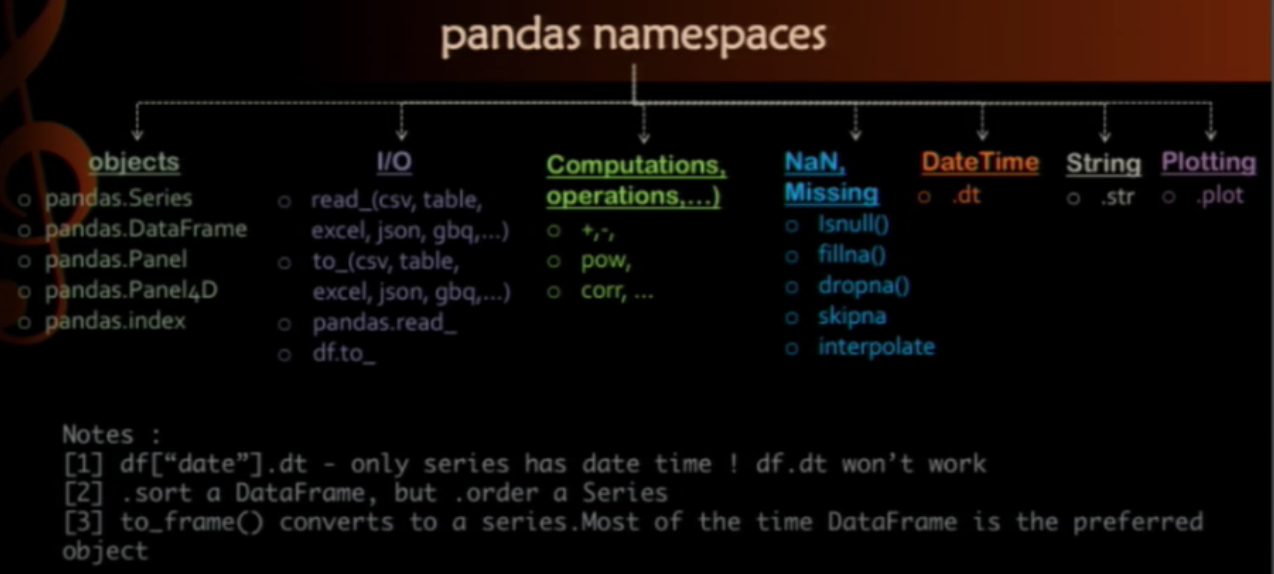

# 3.  Data Wrangling

Complete examples:    
[Kaggle Titanic: Data Wrangling + Training](https://github.com/xsankar/cautious-octo-waffle/blob/master/020-Titanic.ipynb)    
[RecSys challenge 2015: Predict buying patterns](https://github.com/xsankar/cautious-octo-waffle/blob/master/030-Orders.ipynb)    
[RecSys 2015](https://github.com/xsankar/cautious-octo-waffle/blob/master/050-RecSys-2015.ipynb)    

## 3.1 Cleaning Data

[Comprehensive Introduction to Data Wrangling](https://www.springboard.com/blog/data-wrangling/)   
[What is Data Quality and Why does it matter?](https://www.springboard.com/blog/data-quality/)   
[Top 5 most common data quality issues](https://www.edq.com/blog/the-top-5-most-common-data-quality-issues/)    
[Data Quality Improvements](https://blogs.gartner.com/saul-judah/2014/10/17/data-quality-improvement/)  

### Data Profiling verifies

* what percentage of entries meet the rules
* and that this percentage is above the threshold required by the organization
   
### Issues

* [*Data Imputation*](https://en.wikipedia.org/wiki/Imputation_(statistics)):   
missing (Null/NaN values) and corrupt values (data ranges...)   
note: NaN means 'I don't know', so it's better than 0
  * either drop records
  * or use default values based on client feedback, decide which makes sense for this problem
* *Data filtering*:   
outliers, duplicate entries and other irregularities
* *Inconsistent formatting*:   
dates and numbers, unusual character sets and symbols, measurement units, different languages

### Factors determining data quality

* *Existence*: is there data to work with?
* *Consistency*: if a data point appears in multiple locations, does it bear the same meaning?
* *Accuracy*: does the data represent real facts and properties?
* *Integrity*: does the data depict genuine relationships?
* *Validity*: do the data entries make sense? does the data conform to the respective standards set for it?
* *Completeness*
* *Uniqueness*
* *Timeliness*: how much of an impact does data and time have on data?

Make sure you have all the critical pieces of data you need!

In [ ]:
df.count()
df
df.head(3)
df.tail(3)
df.dtypes

In [ ]:
# Drop missing or null values
pd.isnull(df).any()
pd.dropna()
df_cars.dropna().describe()
# skipna()
# fillna(): forward fill, backward fill
fillna('')
# interpolate()

In [ ]:
# One column with different measurement units (e.g. different currencies)
sales['Consumer spent'] = sales['Units sold'] * sales['List price']
sales
# backfill method: go to 'USD' row then fill all NaN cells before with 'USD'
sales['Currency'] = sales.Title.str.extract(r'\((.*)\)').fillna(method=backfill)

<img src="df_different_currencies.png" width="350">
<img src="df_different_currencies_2.png" width="350">
<img src="df_different_currencies_3.png" width="350">

## 3.2 Exploratory Data Analysis

### Filtering data

In [ ]:
ageover30 = df[df['Age'] > 30]
sexfemale = df[df['Sex'] == 'female']
femaleover30 = df[(df['Age'] > 30) & (df['Sex'] == 'female')]
df_cars.ix[0]  # not df_cars[0]
df_cars.iloc[5]  # 5th record
df_cars.loc[5]   # 5th row with the label (when no int index)
df_cars.mpg.head()  # this is a Series (column, 1d, same as np.array)
df_cars['mpg'].tail()
df_cars[['mpg', 'hp']].tail()

### Descriptive statistics
* Explore the statistical tendencies of **each feature**:
  * accross the complete data set
  * inside each group by feature value (male and female, more/less than 30)
  * inside each group by label value (label:Converted customers vs feat:TargetingMethod via email vs via social media -> social media working less)
  
  
* Explore statistical relations **between features**:
  * plot histograms between pairs of features if you see a pattern (feat:Age vs class:Converted)
   
[DataFrame.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html): examples of describing numeric Series, categorical Series, timestamp Series, DataFrames...

  
You start seeing **patterns** and you verify your assertions visually through plots, as well as by using some statistical tests (inferential statistics).

In [ ]:
df_cars[['colname1', 'colname2']].describe()
femaleover30.describe()

In [ ]:
s = pd.Series([1, 2, 3])
s.describe()
# Output:
# count    3.0
# mean     2.0
# std      1.0
# min      1.0
# 25%      1.5
# 50%      2.0
# 75%      2.5
# max      3.0
# dtype: float64

In [ ]:
df_cars.min()
df_cars.quantile()
df_cars.corr()  # returns a DataFrame
df_cars.cov()
df_cars.hp.corr(df_cars.weight)  # corr. of 'horse power' vs 'weight'

### Grouping data

In [ ]:
df.groupby('Sex').Survived.value_counts()
# Output:
# Sex     Survived
# female  1         233
#         0         81
# male    1         109
#         0         468
# Name: Survived, dtype: int64

In [ ]:
# mean for each value of the 'automatic' feature:
# - split data into 'automatic=0' and 'automatic=1'
# - calculate the mean for each group
# - without 'to_frame()': returns a Series
df_cars.groupby('automatic').mean()['mpg'].to_frame()
df_cars.groupby('automatic').mean()[['weight', 'hp', 'mpg']]
df.groupby('Sex').size()
df.groupby(['Sex', 'Survived']).size()
by_gender = df_train.groupby(['Sex', 'Survived']).size().unstack()
by_gender.rename(index=str, columns={0:'Dead', 1: 'Live'})
by_gender['Total'] = by_gender[0] + by_gender[1] # adds a new column and calculates sum row by row
by_gender['Percent'] = (by_gender[1] / by_gender['Total']) * 100 # new percentages column (survived male vs female)

print 'F-Survived      = %2.2f %%' % ( (233.0/(81+233))*100 )
print 'M-Survived      = %2.2f %%' % ( (109.0/(468+109))*100 )
print 'All-Survived    = %2.2f %%' % ( ((233.0+109)/(81+233+468+109))*100 )
print 'All-NotSurvived = %2.6f %%' % ( 100-(((233.0+109)/(81+233+468+109))*100 )

In [ ]:
pd.crosstab(df['Sex'], df['Survived'])
# same as df.groupby(['Sex', 'Survived']).size()

### Plotting data
[plotting](https://github.com/xsankar/cautious-octo-waffle/blob/master/002-TestGGPlot.ipynb)

### Exporting data

In [ ]:
result_df.to_excel('result.xlsx')

## 3.3 Transformations, aggregations and join

SEE:  
https://github.com/xsankar/cautious-octo-waffle/blob/master/030-Orders.ipynb  
https://github.com/xsankar/cautious-octo-waffle/blob/master/050-RecSys-2015.ipynb  

# 4. Building the model

* Features: numeric, categorical + scaling
* Labels: boolean, discrete, continuous
* Modeling:
  * Start with a simple ML algorithm, tune the parameters

# 5. Showing the results

* To the team: evaluation metrics (accuracy...)
* To the client: data storytelling
  * **conclusions** drawn from exploratory data analysis and from the model's predictions
  * **highlight** the most relevant features (e.g. We are selling more to feat:Age=30s people feat:TargetedVia=email)
  * **recommendations** about how they should use your results (focus the targeting on young people with emails)